# EXPLORATION

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


## Extrait et Shape du Dataset

In [4]:
## Paths
#folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
# folder_path_C = '../data/raw/Sales'


## Load dataset
#output_file = os.path.join(folder_path_M, 'merged_sales_data.csv')
output_file = os.path.join(folder_path_Y, 'merged_sales_data.csv')
# output_file = os.path.join(folder_path_C, 'merged_sales_data.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)

# Process chunks
df_sales = pd.concat(chunk for chunk in chunks)


print("\n","extrait du Dataset" , df_sales.head(), "\n")
print("\n","Shape du Dataset",df_sales.shape, "\n")



 extrait du Dataset                   idannonce type_annonceur typedebien typedetransaction  \
0  entities-1037638-4560933             pr          m                 v   
1      immo-facile-57743459             pr          a                 v   
2  entities-1037666-4560741             pr          m                 v   
3      immo-facile-57762298             pr          m                 v   
4      immo-facile-57762759             pr          m                 v   

   etage  surface  surface_terrain  nb_pieces  prix_bien  prix_maison  ...  \
0      0       79            470.0          4     241000          NaN  ...   
1      0       65            650.0          2     136000          NaN  ...   
2      0      114            450.0          5     260900          NaN  ...   
3      0      148           1500.0          7     286000          NaN  ...   
4      0      213           2251.0          8     435000          NaN  ...   

   UU2010  REG  DEP  loyer_m2_median_n6  nb_log_n6 taux_ren

## Gestion des Doublons

In [5]:
print("nombres de lignes en double", df_sales.duplicated().sum())
df_sales.drop_duplicates(inplace=True)
print("nombres de lignes en double après suppression", df_sales.duplicated().sum())
print("\n","Shape du Dataset après élimination des doublons",df_sales.shape, "\n")

nombres de lignes en double 0
nombres de lignes en double après suppression 0

 Shape du Dataset après élimination des doublons (4935936, 59) 



## Gestion des NANs

### Proportions des NANs

In [6]:
missing_data_percentage_sales = df_sales.isna().sum()*100/len(df_sales)

missing_value_percentage_sales = pd.DataFrame({'column_name': df_sales.columns,
                                         'percent_missing': missing_data_percentage_sales,
                                         'dtypes':df_sales.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_sales.index = range(1, len(missing_value_percentage_sales) + 1)

display(missing_value_percentage_sales)

,column_name,percent_missing,dtypes
1,parking,99.761423,object
2,videophone,99.005579,object
3,prix_terrain,98.686490,float64
4,prix_maison,98.677738,float64
5,surface_balcon,97.638523,float64
6,nb_terraces,80.589598,float64
7,charges_copro,72.698268,float64
8,porte_digicode,72.553980,object
9,nb_logements_copro,72.326525,float64
10,ascenseur,70.922334,object


### Visualisation des NANs

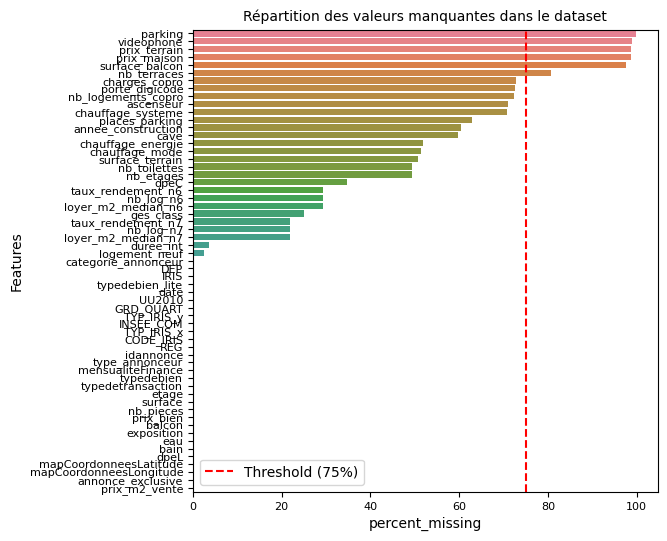

In [7]:
plt.figure(figsize=(6, 6))

sns.barplot(
    y=missing_value_percentage_sales.column_name,
    x=missing_value_percentage_sales.percent_missing,
    hue=missing_value_percentage_sales.column_name,
    order=missing_value_percentage_sales.column_name
)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=75, color='red', linestyle='--', label='Threshold (75%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Features')
plt.legend()

plt.show()



### Elimination de colonnes (valeurs manquantes supérieures à 75 %)

In [8]:
# Filtrer les colonnes avec un taux de valeurs manquantes inférieur ou égal à 75%
columns_to_keep = missing_data_percentage_sales[missing_data_percentage_sales <= 75].index

# Mettre à jour le DataFrame en gardant uniquement les colonnes sélectionnées
df_sales_short_1 = df_sales[columns_to_keep]

print("Colonnes conservées :", list(columns_to_keep))
print("\nShape du Dataset après élimination des colonnes :", df_sales_short_1.shape)

Colonnes conservées : ['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction', 'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien', 'mensualiteFinance', 'balcon', 'eau', 'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'places_parking', 'cave', 'exposition', 'ges_class', 'annee_construction', 'nb_toilettes', 'porte_digicode', 'ascenseur', 'nb_logements_copro', 'charges_copro', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int', 'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'prix_m2_vente']

Shape du Dataset après élimination des colonnes : (4935936, 53)


## Conversion de la colonne 'date' 

In [9]:
df_sales_short_1['date'] = pd.to_datetime(df_sales_short_1['date'], errors='coerce')
print(df_sales_short_1['date'].head())

0   2025-02-01
1   2025-02-01
2   2025-02-01
3   2025-02-01
4   2025-02-01
Name: date, dtype: datetime64[ns]


C:\Users\charl\AppData\Local\Temp\ipykernel_27528\2365830938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_short_1['date'] = pd.to_datetime(df_sales_short_1['date'], errors='coerce')


# DATAVIZ

### Modalités des variables catégorielles ( moins de 10 modalités )

In [10]:
# Combine object and numerical columns
columns_to_check = df_sales_short_1.select_dtypes(include=['object', 'int64', 'float64']).columns

columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_short_1[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) < 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)


Column: type_annonceur
Unique Values: ['pr' 'pa']
--------------------------------------------------
Column: typedebien
Unique Values: ['m' 'a' 'an' 'mn' 'Maison/Villa neuve' 'h' 'l']
--------------------------------------------------
Column: typedetransaction
Unique Values: ['v' 'vp' 'pi']
--------------------------------------------------
Column: annonce_exclusive
Unique Values: ['0' 'Oui' 'Non']
--------------------------------------------------
Column: cave
Unique Values: [False True]
--------------------------------------------------
Column: porte_digicode
Unique Values: [False True]
--------------------------------------------------
Column: ascenseur
Unique Values: [False True]
--------------------------------------------------
Column: chauffage_mode
Unique Values: ['Individuel' 'Collectif' 'Individuel, Central' 'Central'
 'Collectif, Central' 'Collectif, Individuel'
 'Collectif, Individuel, Central']
--------------------------------------------------
Column: categorie_annonceur


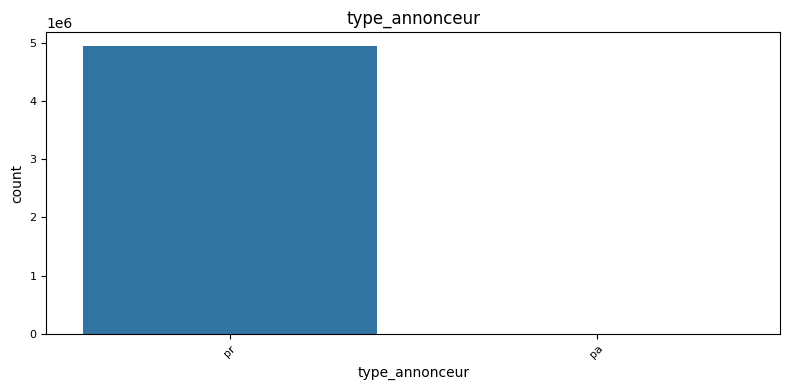

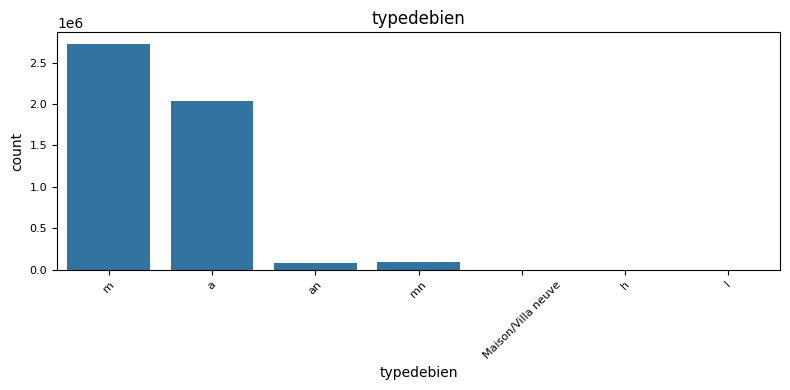

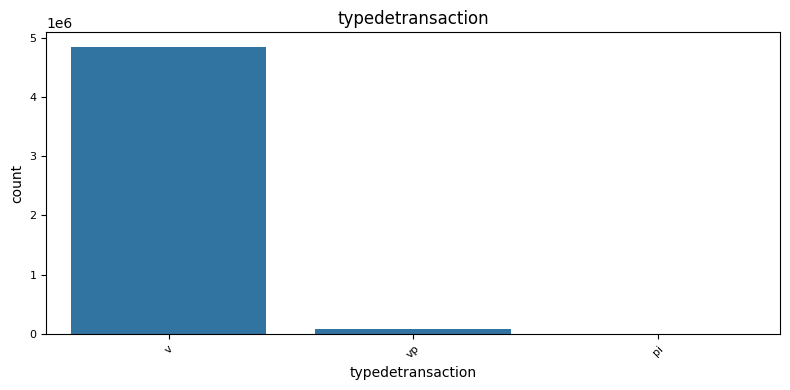

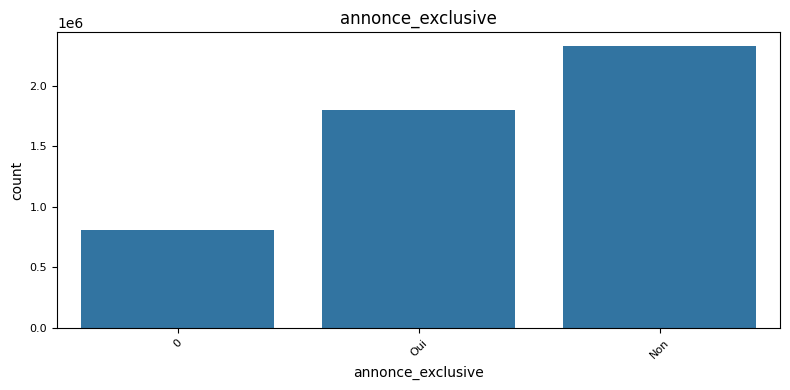

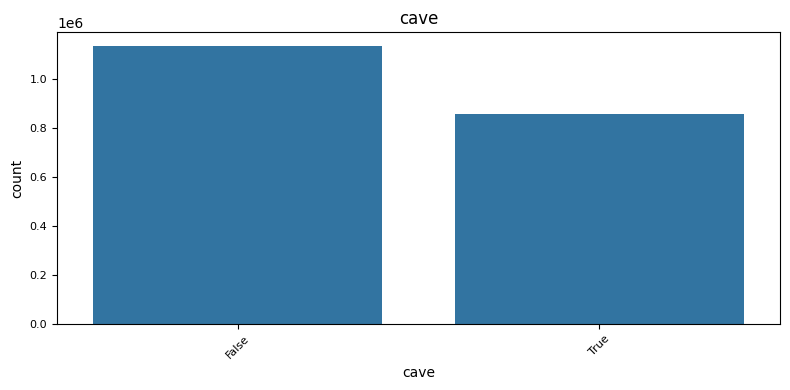

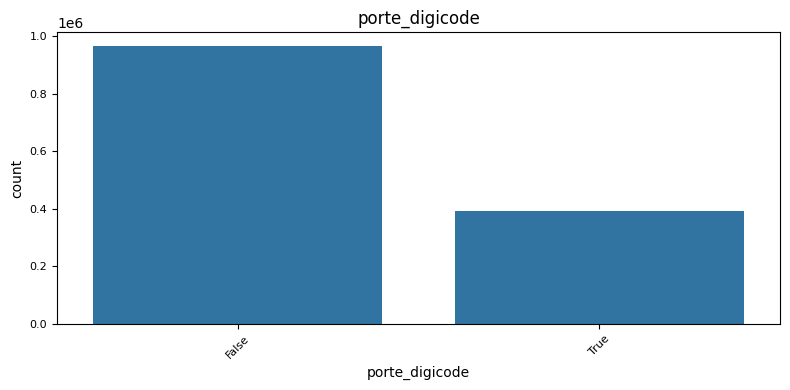

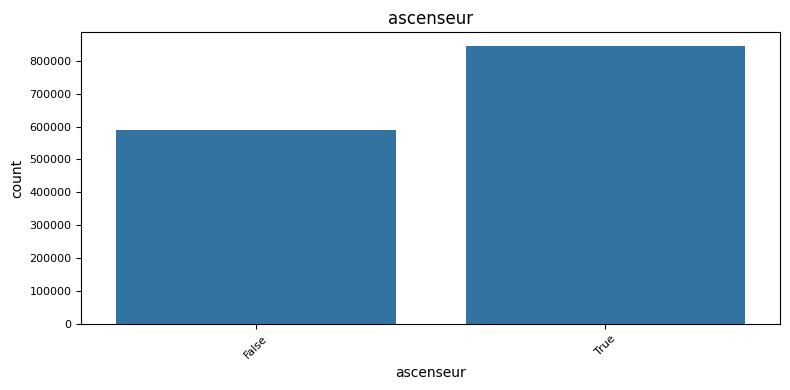

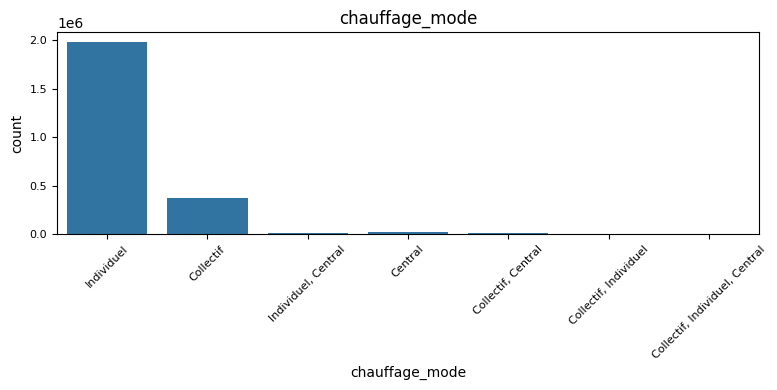

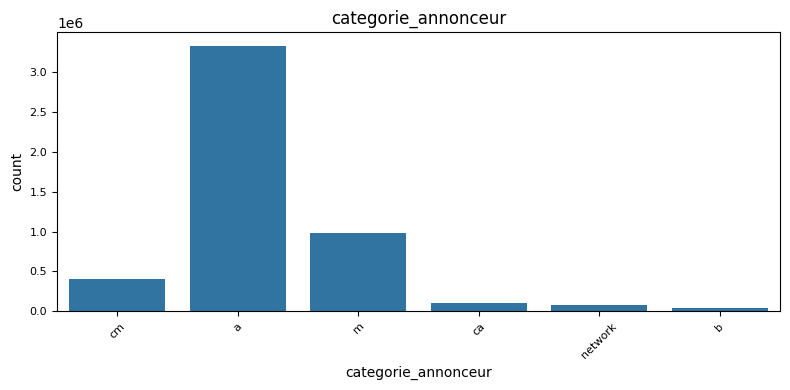

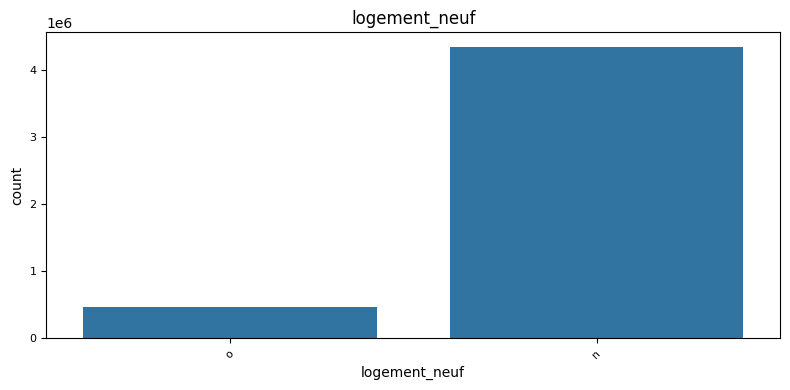

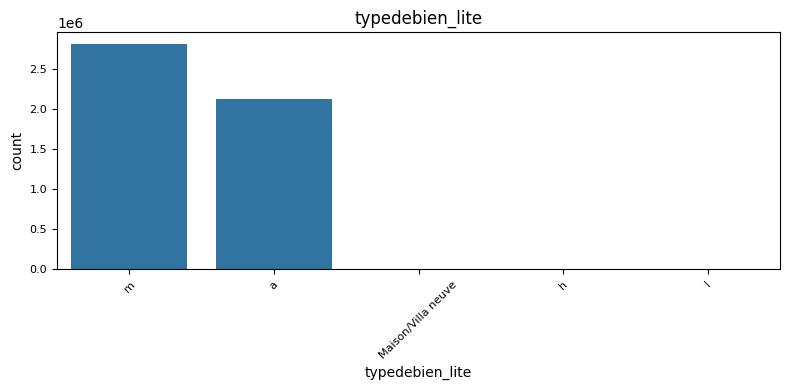

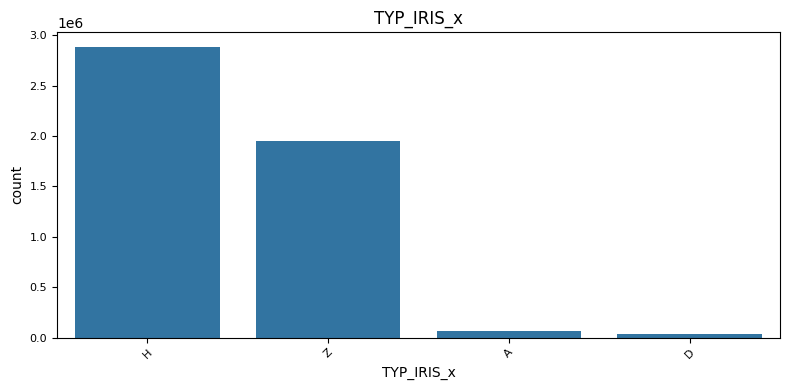

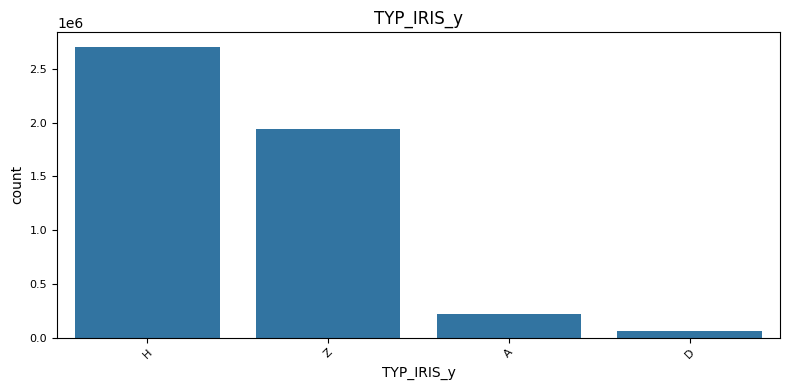

In [11]:
for var_to_viz in columns_checked:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_sales_short_1, x=var_to_viz)
    plt.title(f'{var_to_viz}')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

### Modalités des autres variables ( plus de 10 modalités )

In [12]:
columns_investigated = columns_checked
df_sales_remaining = df_sales_short_1.drop(columns_investigated,axis=1)

columns_to_check = df_sales_remaining.select_dtypes(include=['object']).columns
columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_remaining[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) > 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

Column: idannonce
Unique Values: ['entities-1037638-4560933' 'immo-facile-57743459'
 'entities-1037666-4560741' ... 'orpi-1-129011E1Q7IG'
 'orpi-1-129011E1W58D' 'orpi-1-129011E1L4UB']
--------------------------------------------------
Column: dpeL
Unique Values: ['0' 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B' 'Blank' 'B kWh/m².year' '856'
 'D kWh/m².year' 'A kWh/m².year' 'E kWh/m².year' 'C kWh/m².year'
 'Classe indeterminee' "'" '0 kWh/m².year' 'F kWh/m².year'
 'D - 231 kWh/m².year' 'D-218 kWh/m².year' '26']
--------------------------------------------------
Column: exposition
Unique Values: ['0' 'Sud-Ouest' 'Sud' 'Sud-Est' 'Sud/Est' 'Est' 'SO' 'Ouest' 'E, S'
 'Est-Ouest' 'Nord-Ouest' 'Nord-Sud' 'sud-ouest' 'sud-est'
 'Traversant-Est-Ouest' 'traversant' 'Nord' 'traversant nord-sud'
 'nord-est / sud-ouest' 'Sud-Est-Ouest' 'Nord-Est' 'OUEST' 'NE'
 'Sud/Ouest' 'NS' 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord/Ouest'
 'Nord Sud Est Ouest' 'SUD EST' 'Nord-ouest' 'nord-ouest / sud-est'
 'EST SUD OUEST'

# VARIABLES EXPICATIVES À ÉLIMINER

In [13]:
# La colonne 'idannonce' est un identifiant unique pour chaque annonce, elle n'est pas utile pour l'analyse
# La colonne 'annonce_exclusive' est une variable qui n'est pas utile pour l'analyse
# La colonne 'typedebien' et 'typedebien_lite' contiennent les mêmes informations; nous gardons la plus riche des deux : 'typedebien
# La colonne 'type_annonceur' offre une distribution de valeurs trop déséquilibrée
# Les colonnes 'REG', 'DEP', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010' sont des colonnes contenant de l'information redondante, de plus nous créerons une nouvelle colonne pour le code postal, générée à partir des coordonnées géographiques
# nous gardons la colonne 'INSEE_COM' pour l'utiliser lors de la gestion des outliers après le split
df_sales_short_2 = df_sales_short_1.drop(columns=['idannonce', 'annonce_exclusive', 'typedebien_lite', 'type_annonceur', 
                                                  'REG', 'DEP', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010'], axis=1)

df_sales_short_2.shape

(4935936, 41)

# VARIABLES EXPLICATIVES À TRAITER

In [14]:
# les variables porte_digicode, ascenseur et cave sont des variables binaires typées en 'object'
# nous les transofrmins en type boleeen
bool_columns = ['porte_digicode', 'cave', 'ascenseur']
for col in bool_columns:
    df_sales_short_2[col] = df_sales_short_2[col].astype(bool)

# vérification des types des colonnes converties
df_sales_short_2[bool_columns].dtypes

porte_digicode    bool
cave              bool
ascenseur         bool
dtype: object

In [15]:
# La variable "annee_construction" est transformée en variable catégorielle non ordinale :

# Définir les plages et les catégories (plages trouvées du le net comme étant celles correspondant à des ensembles cohérents)
bins = [float('-inf'), 1948, 1974, 1977, 1982, 1988, 2000, 2005, 2012, 2021, float('inf')]
labels = [
    "avant 1948", "1948-1974", "1975-1977", "1978-1982", "1983-1988",
    "1989-2000", "2001-2005", "2006-2012", "2013-2021", "après 2021"
]
df_sales_short_2['annee_construction'] = pd.cut(df_sales_short_2['annee_construction'], bins=bins, labels=labels, right=False)
# Vérification de la transformation
print(df_sales_short_2['annee_construction'].head())

0           NaN
1    avant 1948
2           NaN
3     1948-1974
4           NaN
Name: annee_construction, dtype: category
Categories (10, object): ['avant 1948' < '1948-1974' < '1975-1977' < '1978-1982' ... '2001-2005' < '2006-2012' < '2013-2021' < 'après 2021']


## DPeL et ges_class

## Création de la colonne CodePostal

In [16]:
!pip install geopandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
folder_path_Y = "C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/"
#folder_path_C = '../data/geo/json'

geo_file_name = 'contours-codes-postaux.geojson'

#input_file = os.path.join(folder_path_C, geo_file_name)
input_file = os.path.join(folder_path_Y, geo_file_name)

pcodes = gpd.read_file(input_file)

# Vérifier
print(pcodes.columns)   

df = df_sales_short_2.copy()
df['lat'] = df['mapCoordonneesLatitude']
df['lon'] = df['mapCoordonneesLongitude']

# Convertir en GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"
)


# Faire la jointure spatiale (point-in-polygon)
result = gpd.sjoin(gdf, pcodes[['codePostal','geometry']], how='left', predicate='within')


# Gardez la première occurrence de chaque index (dans le cas où un point appartiendrait à plusieurs polygones, on ne conserve que le premier)
postal = result['codePostal']
postal = postal[~postal.index.duplicated(keep='first')]

# 3. Ré-indexez sur l’index original de df_sales_short_2 :
df_sales_short_2 = df_sales_short_2.copy()
df_sales_short_2['codePostal'] = postal.reindex(df.index)

# 4. Vérifiez
print(df_sales_short_2[['mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'codePostal']].head())



Index(['codePostal', 'nbNumeros', 'geometry'], dtype='object')
   mapCoordonneesLatitude  mapCoordonneesLongitude codePostal
0                46.24725                  5.23465      01440
1                46.25701                  5.22967      01440
2                46.28638                  5.67499      01100
3                46.25997                  5.23201      01440
4                46.25997                  5.23201      01440


In [18]:
df_sales_short_2.isna().sum()
df_sales_short_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935936 entries, 0 to 4935935
Data columns (total 42 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   typedebien               object        
 1   typedetransaction        object        
 2   etage                    int64         
 3   surface                  int64         
 4   surface_terrain          float64       
 5   nb_pieces                int64         
 6   prix_bien                int64         
 7   mensualiteFinance        int64         
 8   balcon                   int64         
 9   eau                      int64         
 10  bain                     int64         
 11  dpeL                     object        
 12  dpeC                     float64       
 13  mapCoordonneesLatitude   float64       
 14  mapCoordonneesLongitude  float64       
 15  nb_etages                float64       
 16  places_parking           float64       
 17  cave                     bo

# VARIABLE CIBLE ET VARIABLES CORRÉLÉES À LA CIBLE

La variable cible est "prix_m2_vente"

## Visualisation de la distribution de la variable cible

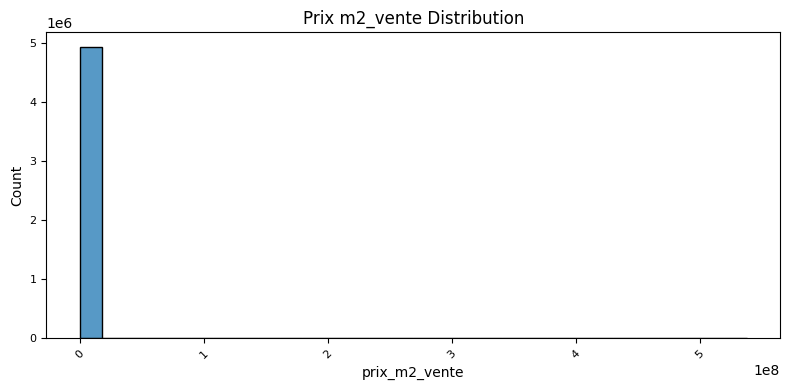

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_short_2, x='prix_m2_vente', bins=30)
plt.title('Prix m2_vente Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners, nous traiterons cette problématique lors du préprocessing (partie suivante)

## Suppression des variables fortement corrélées au target (prix_m2_vente)

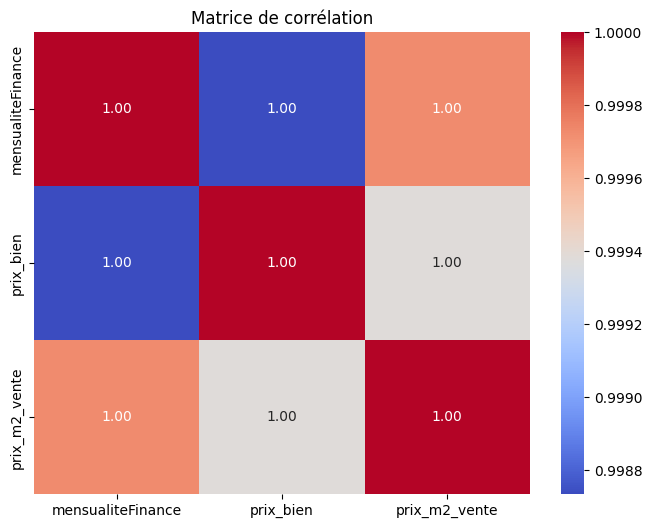

In [20]:

# certaines variables du csv de part leur nature pourraient être trop corrélées avec la variable cible  :
# prix, mensualité, etc.

# Calculer la matrice de corrélation
correlation_matrix = df_sales_short_2[['mensualiteFinance','prix_bien', 'prix_m2_vente']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()



In [21]:
# On va donc supprimer ces variables de la base de données et renommer le DataFrame:
df_sales_short_3 = df_sales_short_2.drop(columns=['mensualiteFinance','prix_bien'])


# SÉPARATION DES DONNÉES TRAIN/TEST

## Sauvegarde du dataset avant split et Synthèse des colonnes restantes

In [22]:
## paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
#folder_path_C = '../data/processed/Sales'

## stocker le dataset nettoyé dans le repertoire de travail et le nommer df_sales_clean.csv
# df_sales_short_3.to_csv(os.path.join(folder_path_M, 'df_sales_clean.csv'), sep=';', index=False)
df_sales_short_3.to_csv(os.path.join(folder_path_Y, 'df_sales_clean.csv'), sep=';', index=False)
# df_sales_short_3.to_csv(os.path.join(folder_path_C, 'df_sales_clean.csv'), sep=';', index=False)

# Reload dataset
# output_file = os.path.join(folder_path_M, 'df_sales_clean.csv')
output_file = os.path.join(folder_path_Y, 'df_sales_clean.csv')
#output_file = os.path.join(folder_path_C, 'df_sales_clean.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)
# Process chunks
df_sales_clean = pd.concat(chunk for chunk in chunks)

## Rappel des colonnes restantes
print("Colonnes restantes dans le DataFrame :")
print(df_sales_clean.columns)
print(df_sales_clean.dtypes)
print("\nShape du Dataset après élimination des colonnes :", df_sales_clean.shape)

Colonnes restantes dans le DataFrame :
Index(['typedebien', 'typedetransaction', 'etage', 'surface',
       'surface_terrain', 'nb_pieces', 'balcon', 'eau', 'bain', 'dpeL', 'dpeC',
       'mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'nb_etages',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'porte_digicode', 'ascenseur',
       'nb_logements_copro', 'charges_copro', 'chauffage_energie',
       'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur',
       'logement_neuf', 'duree_int', 'date', 'INSEE_COM', 'loyer_m2_median_n6',
       'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7',
       'taux_rendement_n7', 'prix_m2_vente', 'codePostal'],
      dtype='object')
typedebien                  object
typedetransaction           object
etage                        int64
surface                      int64
surface_terrain            float64
nb_pieces                    int64
balcon                    

## Split en 2 étapes

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Séparation initiale en train et test
train_data, test_data = train_test_split(df_sales_clean, test_size=0.2, random_state=42)

# Nettoyage des données d'entraînement pour la variable cible
y_train_series = train_data['prix_m2_vente']
lower = y_train_series.quantile(0.05)
upper = y_train_series.quantile(0.95)
IQR = upper - lower
lower_bound = lower - 1.5 * IQR
upper_bound = upper + 1.5 * IQR
train_data_clean = train_data[(y_train_series >= lower_bound) & (y_train_series <= upper_bound)]


# Nettoyage des données d'entraînement pour les variables explicatives 
# Paramètres
OUTLIER_TAG = -999
GROUP_COL = 'INSEE_COM'

# Colonnes numériques d’origine (avant flags)
orig_num_cols = (
    train_data_clean
    .select_dtypes(include='number')
    .columns
    .difference(['mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'prix_m2_vente'])
    .tolist()
)

# Calcul des bornes d'outliers et des médianes sur le jeu de train
percentiles = {
    col: (
        train_data_clean[col].dropna().quantile(0.05),
        train_data_clean[col].dropna().quantile(0.95)
    )
    for col in orig_num_cols
}

df_no_tag = train_data_clean.replace(OUTLIER_TAG, np.nan)
group_medians = (
    df_no_tag
    .groupby(GROUP_COL)[orig_num_cols]
    .median()
)
global_medians = df_no_tag[orig_num_cols].median()
group_medians = group_medians.fillna(global_medians)

# Traitement des outliers dans les variables explicatives
for col in orig_num_cols:
    lower, upper = percentiles[col]
    mask = (train_data_clean[col] < lower) | (train_data_clean[col] > upper)
    train_data_clean.loc[mask, col] = OUTLIER_TAG
    train_data_clean[f'{col}_outlier_flag'] = mask.astype(int)
    mapped = train_data_clean[GROUP_COL].map(group_medians[col])
    train_data_clean[col] = train_data_clean[col].mask(
        train_data_clean[col] == OUTLIER_TAG,
        mapped.fillna(global_medians[col])
    )

# Séparation des variables explicatives et de la variable cible
X_train = train_data_clean.drop(columns=['prix_m2_vente'])
y_train = train_data_clean['prix_m2_vente']

X_test = test_data.drop(columns=['prix_m2_vente'])
y_test = test_data['prix_m2_vente']

# Traitement des outliers dans X_test avec les mêmes bornes que pour X_train
# et en utilisant les mêmes médianes de groupe
for col in orig_num_cols:
    lower, upper = percentiles[col]
    mask_test = (X_test[col] < lower) | (X_test[col] > upper)
    X_test.loc[mask_test, col] = OUTLIER_TAG
    X_test[f'{col}_outlier_flag'] = mask_test.astype(int)
    mapped = X_test[GROUP_COL].map(group_medians[col])
    X_test[col] = X_test[col].mask(
        X_test[col] == OUTLIER_TAG,
        mapped.fillna(global_medians[col])
    )



C:\Users\charl\AppData\Local\Temp\ipykernel_27528\1399368606.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_clean[f'{col}_outlier_flag'] = mask.astype(int)
C:\Users\charl\AppData\Local\Temp\ipykernel_27528\1399368606.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_clean[col] = train_data_clean[col].mask(
C:\Users\charl\AppData\Local\Temp\ipykernel_27528\1399368606.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [24]:

# Afficher les shapes des datasets
print("Shape de X_train :", X_train.shape)
print("Shape de X_test :", X_test.shape)
print("Shape de y_train :", y_train.shape)
print("Shape de y_test :", y_test.shape)

Shape de X_train : (3943567, 60)
Shape de X_test : (987188, 60)
Shape de y_train : (3943567,)
Shape de y_test : (987188,)


# PREPROCESSING

## Gestion des outliers de X_train

In [25]:
# Visualiser les premières lignes
pd.set_option('display.max_columns', None)
X_train.head(10)

,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,dpeL,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,nb_etages,places_parking,cave,exposition,ges_class,annee_construction,nb_toilettes,porte_digicode,ascenseur,nb_logements_copro,charges_copro,chauffage_energie,chauffage_systeme,chauffage_mode,categorie_annonceur,logement_neuf,duree_int,date,INSEE_COM,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,codePostal,bain_outlier_flag,balcon_outlier_flag,charges_copro_outlier_flag,codePostal_outlier_flag,dpeC_outlier_flag,duree_int_outlier_flag,eau_outlier_flag,etage_outlier_flag,loyer_m2_median_n6_outlier_flag,loyer_m2_median_n7_outlier_flag,nb_etages_outlier_flag,nb_log_n6_outlier_flag,nb_log_n7_outlier_flag,nb_logements_copro_outlier_flag,nb_pieces_outlier_flag,nb_toilettes_outlier_flag,places_parking_outlier_flag,surface_outlier_flag,surface_terrain_outlier_flag,taux_rendement_n6_outlier_flag,taux_rendement_n7_outlier_flag
4898470,a,v,0.0,44.0,NaN,2.0,0.0,0.0,1.0,C,139.0,49.05199,2.00478,3.0,NaN,True,Sud-Est,D,1989-2000,1.0,True,False,NaN,1890.0,Gaz,Radiateur,Individuel,a,n,21.0,2020-07-01,95127,18.42,22.0,0.061,18.28,782.0,0.061,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
893954,m,v,0.0,110.0,3656.0,5.0,0.0,2.0,1.0,D,224.0,45.15334,0.69890,NaN,1.0,True,0,F,1948-1974,2.0,True,True,NaN,NaN,Fioul,NaN,Individuel,a,n,-757.0,2020-01-01,24138,NaN,NaN,NaN,NaN,NaN,NaN,24660.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
720929,mn,v,0.0,94.0,345.0,5.0,0.0,0.0,0.0,0,NaN,46.01595,-0.34905,NaN,NaN,True,0,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,cm,NaN,0.0,2020-07-01,17024,NaN,NaN,NaN,NaN,NaN,NaN,17470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97339,a,v,3.0,101.0,NaN,4.0,0.0,0.0,0.0,0,NaN,43.83330,5.78333,NaN,2.0,True,Sud,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,a,n,29.0,2022-07-01,4112,9.75,17.0,0.029,10.00,114.0,0.030,4100.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4808612,a,v,0.0,76.0,NaN,4.0,0.0,0.0,0.0,E,250.0,48.82112,2.52105,NaN,NaN,True,0,E,NaN,NaN,True,True,NaN,NaN,Électrique,NaN,NaN,a,n,42.0,2021-03-01,94017,20.50,1.0,0.034,26.54,233.0,0.044,94500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3691855,m,v,0.0,121.0,400.0,4.0,0.0,0.0,0.0,C,130.0,48.66349,2.57210,1.0,NaN,False,0,C,1983-1988,NaN,False,True,NaN,NaN,Gaz,Radiateur,NaN,m,n,15.0,2022-04-01,77122,14.54,4.0,0.050,14.99,11.0,0.052,77380.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2708513,m,v,0.0,158.0,1156.0,6.0,0.0,1.0,1.0,VI,NaN,49.34854,1.95667,NaN,NaN,True,0,VI,NaN,2.0,True,True,NaN,NaN,Fioul,Radiateur,Individuel,a,n,-871.0,2020-05-01,60319,NaN,NaN,NaN,NaN,NaN,NaN,60390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3526269,a,v,4.0,53.0,NaN,3.0,0.0,0.0,1.0,C,133.0,48.88836,2.30611,5.0,NaN,True,0,D,NaN,1.0,True,True,20.0,1440.0,NaN,NaN,NaN,a,n,22.0,2020-08-01,75117,33.49,41.0,0.041,32.21,2553.0,0.040,75017.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4709310,a,v,0.0,75.0,NaN,4.0,1.0,0.0,1.0,E,255.0,48.85655,2.51862,5.0,NaN,True,0,E,1975-1977,1.0,True,True,NaN,2280.0,Gaz,Radiateur,Collectif,a,n,20.0,2020-10-01,93050,17.32,2.0,0.062,15.22,89.0,0.055,93330.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
955098,a,v,0.0,110.0,NaN,2.0,0.0,0.0,1.0,F,404.0,48.86575,1.41987,NaN,NaN,False,0,C,NaN,1.0,True,False,20.0,1868.0,Électrique,NaN,Individuel,a,n,52.0,2024-09-01,27230,14.29,3.0,0.063,14.29,3.0,0.063,27530.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Visualisation de la distribution de la target 

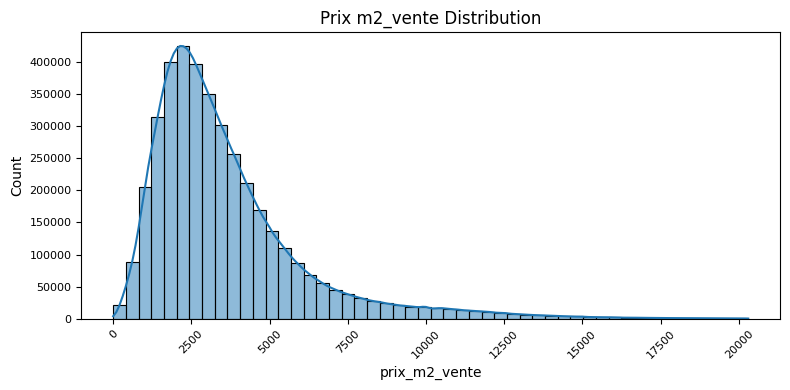

In [26]:
# Visualisation de la distribution de la target(après nettoyage effectué lors du split)
plt.figure(figsize=(8, 4))
sns.histplot(data=y_train, bins=50, kde=True)
plt.title('Prix m2_vente Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

## Gestion des Nan et encodage


### Imputer et encoder les variables catégorielles

In [27]:
#Categorielles Ordinales
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()


ordinales = ["ges_class", "dpeL", "logement_neuf", "nb_pieces", "bain", "eau", "nb_toilettes", "balcon"]
# creation d'une pipeline pour faire un imputer et un encodage
pipeline_ordinale = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))])


ord_transformed_train = pipeline_ordinale.fit_transform(X_train_encoded[ordinales])
ord_transformed_test = pipeline_ordinale.transform(X_test_encoded[ordinales])

# Convertir le résultat en DataFrame
ord_columns = ordinales
ord_train = pd.DataFrame(ord_transformed_train, columns=ord_columns, index=X_train_encoded.index)
ord_test = pd.DataFrame(ord_transformed_test, columns=ord_columns, index=X_test_encoded.index)

# Eliminer les colonnes originales et concaténer les nouvelles colonnes encodées
X_train_encoded = X_train_encoded.drop(columns=ordinales).join(ord_train)
X_test_encoded = X_test_encoded.drop(columns=ordinales).join(ord_test)
# Vérification finale
print(X_train_encoded.head())
print(X_test_encoded.head())

        typedebien typedetransaction  etage  surface  surface_terrain   dpeC  \
4898470          a                 v    0.0     44.0              NaN  139.0   
893954           m                 v    0.0    110.0           3656.0  224.0   
720929          mn                 v    0.0     94.0            345.0    NaN   
97339            a                 v    3.0    101.0              NaN    NaN   
4808612          a                 v    0.0     76.0              NaN  250.0   

         mapCoordonneesLatitude  mapCoordonneesLongitude  nb_etages  \
4898470                49.05199                  2.00478        3.0   
893954                 45.15334                  0.69890        NaN   
720929                 46.01595                 -0.34905        NaN   
97339                  43.83330                  5.78333        NaN   
4808612                48.82112                  2.52105        NaN   

         places_parking  cave exposition annee_construction  porte_digicode  \
4898470      

In [28]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# 1) Définir les colonnes catégorielles
                                                # cat_cols = []


                                                # col_int = ['etage', 'nb_etages']
                                                # # ajouter toutes les colonnes object non déjà listées
                                                # object_cols = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
                                                # cat_col = []
                                                # cat_col += col_int
                                                # cat_cols += [c for c in object_cols if c not in cat_cols]
                                                # # enlever les colonnes ordinales
                                                # cat_cols = [c for c in cat_cols if c not in ordinales]

########################     Fix Max    ###########################
col_int = ['etage', 'nb_etages'] # Ces deux variables sont numériques mais se comportent comme des variables catégorielles
cat_cols = []
cat_cols += col_int
cat_cols = [str(col) for col in cat_cols] # les convertir en string pour pouvoir les encoder
# Ajouter les colonnes de type 'object' qui ne sont pas déjà dans cat_cols, toutes les colonnes object sont considérées comme catégorielles ici
object_cols = X_train_encoded.select_dtypes(include=['object']).columns
cat_cols.extend(col for col in object_cols if col not in cat_cols)
# Enlever les colonnes qui sont dans 'ordinal_cols'
cat_cols = [col for col in cat_cols if col not in ordinales]

#####################################################################


# # ajouter toutes les colonnes object non déjà listées
# object_cols = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
# cat_cols += [c for c in object_cols if c not in cat_cols]
# # enlever les colonnes ordinales
# cat_cols = [c for c in cat_cols if c not in ordinales]

# 2) Séparer en large ( >10 modalités) et small (≤10 modalités)
#    en s’assurant que la colonne existe toujours dans X_train_encoded
cat_cols = [c for c in cat_cols if c in X_train_encoded.columns]
cat_cols_large = [c for c in cat_cols if X_train_encoded[c].nunique() > 10]
cat_cols_small = [c for c in cat_cols if X_train_encoded[c].nunique() <= 10]

# 3) Target Encoding pour les colonnes high-cardinality
if cat_cols_large:
    # imputation "missing"
    X_train_encoded[cat_cols_large] = X_train_encoded[cat_cols_large].fillna("MISSING")
    X_test_encoded[cat_cols_large]  = X_test_encoded[cat_cols_large].fillna("MISSING")

    # fit-transform
    te = TargetEncoder(cols=cat_cols_large)
    tr_train = te.fit_transform(X_train_encoded[cat_cols_large], y_train)
    tr_test  = te.transform(X_test_encoded[cat_cols_large])

    # remplacer dans les DataFrames
    X_train_encoded = (X_train_encoded
                       .drop(columns=cat_cols_large)
                       .join(pd.DataFrame(tr_train, 
                                          columns=cat_cols_large, 
                                          index=X_train_encoded.index)))
    X_test_encoded  = (X_test_encoded
                       .drop(columns=cat_cols_large)
                       .join(pd.DataFrame(tr_test, 
                                          columns=cat_cols_large, 
                                          index=X_test_encoded.index)))
else:
    print("Aucune colonne à plus de 10 modalités.")

# 4) One-Hot Encoding pour les low-cardinality
if cat_cols_small:
    # pipeline impute + onehot
    pipe_ohe = Pipeline([
        ("impute", SimpleImputer(strategy="constant", fill_value="MISSING")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    # fit_transform / transform
    ohe_train = pipe_ohe.fit_transform(X_train_encoded[cat_cols_small])
    ohe_test  = pipe_ohe.transform(X_test_encoded[cat_cols_small])

    # récupérer les noms de colonnes
    ohe_cols = pipe_ohe.named_steps["onehot"].get_feature_names_out(cat_cols_small)

    # joindre
    X_train_encoded = (X_train_encoded
                       .drop(columns=cat_cols_small)
                       .join(pd.DataFrame(ohe_train, 
                                          columns=ohe_cols, 
                                          index=X_train_encoded.index)))
    X_test_encoded  = (X_test_encoded
                       .drop(columns=cat_cols_small)
                       .join(pd.DataFrame(ohe_test, 
                                          columns=ohe_cols, 
                                          index=X_test_encoded.index)))
else:
    print("Aucune colonne à 10 modalités ou moins.")

# 5) Vérification finale
print(X_train_encoded.head())
print(X_test_encoded.head())


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

         surface  surface_terrain   dpeC  mapCoordonneesLatitude  \
4898470     44.0              NaN  139.0                49.05199   
893954     110.0           3656.0  224.0                45.15334   
720929      94.0            345.0    NaN                46.01595   
97339      101.0              NaN    NaN                43.83330   
4808612     76.0              NaN  250.0                48.82112   

         mapCoordonneesLongitude  places_parking  cave  porte_digicode  \
4898470                  2.00478             NaN  True            True   
893954                   0.69890             1.0  True            True   
720929                  -0.34905             NaN  True            True   
97339                    5.78333             2.0  True            True   
4808612                  2.52105             NaN  True            True   

         ascenseur  nb_logements_copro  charges_copro  duree_int  \
4898470      False                 NaN         1890.0       21.0   
893954    

### Imputer et Encoder les variables numériques continues

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler

###############################################################
# IMPUTATION 
###############################################################

# On fait la boucle seulement sur les colonnes numériques d'origine
valid_num_cols = [col for col in orig_num_cols if col in X_train_encoded.columns]

for col in valid_num_cols:
    # 1) Médiane de chaque groupe (Series indexée par INSEE_COM)
    group_med_series = X_train_encoded.groupby(GROUP_COL)[col].median()

    # 2) Médiane par INSEE_COM pour les 2 jeux de données ("ligne par ligne" via map())
    grp_train = X_train_encoded[GROUP_COL].map(group_med_series)
    grp_test  = X_test_encoded[GROUP_COL].map(group_med_series)

    # 3) médiane globale (sur le train)
    global_med = X_train_encoded[col].median()

    # 4) imputer :
    X_train_encoded[col] = (X_train_encoded[col].fillna(grp_train).fillna(global_med))
    X_test_encoded[col] = (X_test_encoded[col].fillna(grp_test).fillna(global_med))


###############################################################
# STANDARDISATION
###############################################################

# Sélectionner tes colonnes numériques continues à scaler
numeric_cols = (
    X_train_encoded
    .select_dtypes(include=['int64','float64'])
    .columns
)
# retirer les ordinales et celles déjà encodées en int
numeric_cols = [c for c in numeric_cols if c not in ordinales + col_int]

# exclure les coordonnées et codePostal
exclude = ['mapCoordonneesLatitude','mapCoordonneesLongitude','codePostal']
numeric_cols = [c for c in numeric_cols if c not in exclude]

# scaler
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols]  = scaler.transform(X_test_encoded[numeric_cols])

# Vérification
print(X_train_encoded.head())
print(X_test_encoded.head())


          surface  surface_terrain      dpeC  mapCoordonneesLatitude  \
4898470 -1.282446        -0.142997 -0.951426                49.05199   
893954   0.314145         0.830406  0.292486                45.15334   
720929  -0.072908        -0.125104  0.702245                46.01595   
97339    0.096428        -0.057864  0.175412                43.83330   
4808612 -0.508341        -0.129433  0.672977                48.82112   

         mapCoordonneesLongitude  places_parking  cave  porte_digicode  \
4898470                  2.00478       -0.278127  True            True   
893954                   0.69890       -0.278127  True            True   
720929                  -0.34905       -0.278127  True            True   
97339                    5.78333        0.317227  True            True   
4808612                  2.52105       -0.278127  True            True   

         ascenseur  nb_logements_copro  charges_copro  duree_int  \
4898470      False            0.515283       1.052345 

In [30]:
# éliminer la colonne 'INSEE_COM' de X_train_encoded dont nous n'avons plus besoin
X_train_encoded = X_train_encoded.drop(columns=['INSEE_COM'], axis=1)
X_test_encoded = X_test_encoded.drop(columns=['INSEE_COM'], axis=1)

### Encodage des variables géographiques

In [31]:
import numpy as np

lat_rad = np.radians(X_train_encoded['mapCoordonneesLatitude'].values)
lon_rad = np.radians(X_train_encoded['mapCoordonneesLongitude'].values)

# Projection sur la sphère unité :

### X_Train ###
X_train_encoded['x_geo'] = np.cos(lat_rad) * np.cos(lon_rad)
X_train_encoded['y_geo'] = np.cos(lat_rad) * np.sin(lon_rad)
X_train_encoded['z_geo'] = np.sin(lat_rad)

### X_Test ###
lat_rad_test = np.radians(X_test_encoded['mapCoordonneesLatitude'].values)
lon_rad_test = np.radians(X_test_encoded['mapCoordonneesLongitude'].values)
X_test_encoded['x_geo'] = np.cos(lat_rad_test) * np.cos(lon_rad_test)
X_test_encoded['y_geo'] = np.cos(lat_rad_test) * np.sin(lon_rad_test)
X_test_encoded['z_geo'] = np.sin(lat_rad_test)

# Les valeurs retournés sont comprises entre -1 et 1 
# z est la latitude absolue (Nord /sud)
# x > 0 → vers l’Est (Greenwich → 90° E)
#x < 0 → vers l’Ouest (Greenwich → 90° O)
#y > 0 → moitié Nord de l’équateur (longitudes entre 0° et 180° E)
#y < 0 → moitié Sud (longitudes entre 0° et 180° O)

# suppression des colonnes Latitude et Longitude
X_train_encoded = X_train_encoded.drop(columns=['mapCoordonneesLongitude', 'mapCoordonneesLatitude', 'codePostal'])
X_test_encoded = X_test_encoded.drop(columns=['mapCoordonneesLongitude', 'mapCoordonneesLatitude', 'codePostal'])

# Verification
print(X_test_encoded.head())
print(X_train_encoded.head())

          surface  surface_terrain      dpeC  places_parking   cave  \
4897098 -0.218052        -0.194365 -1.609968       -0.278127   True   
4355336  0.072237         0.112403  0.036386       -0.278127   True   
1698063 -0.822821        -0.084991  0.277852       -0.278127   True   
2074227 -0.871203        -0.057286  0.131509       -0.278127   True   
3065211 -0.484151        -0.123661  0.058338       -0.278127  False   

         porte_digicode  ascenseur  nb_logements_copro  charges_copro  \
4897098            True       True           -0.067209       0.517189   
4355336            True       True           -0.049734       0.138463   
1698063            True       True           -0.288555      -0.174398   
2074227            True       True           -0.084683       0.489745   
3065211            True       True           -0.137108       0.517189   

         duree_int  loyer_m2_median_n6  nb_log_n6  taux_rendement_n6  \
4897098   0.195545            0.106867  -0.666773           0.

In [32]:
print(X_test_encoded.isna().sum().sum())
print(X_train_encoded.isna().sum().sum())

mask_inf = X_train_encoded.select_dtypes(include=[np.number]) \
                          .isin([np.inf, -np.inf]) \
                          .any(axis=1)

rows_with_inf = X_train_encoded[mask_inf]
print(f"Nombre de lignes avec ±inf : {len(rows_with_inf)}")
print(rows_with_inf)

0
0
Nombre de lignes avec ±inf : 0
Empty DataFrame
Columns: [surface, surface_terrain, dpeC, places_parking, cave, porte_digicode, ascenseur, nb_logements_copro, charges_copro, duree_int, loyer_m2_median_n6, nb_log_n6, taux_rendement_n6, loyer_m2_median_n7, nb_log_n7, taux_rendement_n7, bain_outlier_flag, balcon_outlier_flag, charges_copro_outlier_flag, codePostal_outlier_flag, dpeC_outlier_flag, duree_int_outlier_flag, eau_outlier_flag, etage_outlier_flag, loyer_m2_median_n6_outlier_flag, loyer_m2_median_n7_outlier_flag, nb_etages_outlier_flag, nb_log_n6_outlier_flag, nb_log_n7_outlier_flag, nb_logements_copro_outlier_flag, nb_pieces_outlier_flag, nb_toilettes_outlier_flag, places_parking_outlier_flag, surface_outlier_flag, surface_terrain_outlier_flag, taux_rendement_n6_outlier_flag, taux_rendement_n7_outlier_flag, ges_class, dpeL, logement_neuf, nb_pieces, bain, eau, nb_toilettes, balcon, nb_etages, exposition, chauffage_energie, chauffage_systeme, date, etage_-2.0, etage_0.0, etage

In [33]:
# Les colonnes du type boolean ne sont pas encodées car interprétables par les modèles de regression


## Christophe - Feature selection

In [34]:
# !pip install lightgbm 

In [35]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
#folder_path_C = '../data/processed/Sales'

## stocker le dataset nettoyé dans le repertoire de travail et le nommer df_sales_clean.csv
# X_test_encoded.to_csv(os.path.join(folder_path_M, 'X_test_encoded.csv'), sep=';', index=False)
# X_train_encoded.to_csv(os.path.join(folder_path_M, 'X_train_encoded.csv'), sep=';', index=False)
# y_train_clean.to_csv(os.path.join(folder_path_M, 'y_train_clean.csv'), sep=';', index=False)
# y_train.to_csv(os.path.join(folder_path_M, 'y_train.csv'), sep=';', index=False)

X_test_encoded.to_csv(os.path.join(folder_path_Y, 'X_test_encoded.csv'), sep=';', index=False)
X_train_encoded.to_csv(os.path.join(folder_path_Y, 'X_train_encoded.csv'), sep=';', index=False)
# #y_train_clean.to_csv(os.path.join(folder_path_Y, 'y_train_clean.csv'), sep=';', index=False)
y_train.to_csv(os.path.join(folder_path_Y, 'y_train.csv'), sep=';', index=False)

# X_test_encoded.to_csv(os.path.join(folder_path_C, 'X_test_encoded.csv'), sep=';', index=False)
# X_train_encoded.to_csv(os.path.join(folder_path_C, 'X_train_encoded.csv'), sep=';', index=False)
# y_train_clean.to_csv(os.path.join(folder_path_C, 'y_train_clean.csv'), sep=';', index=False)
# y_train.to_csv(os.path.join(folder_path_C, 'y_train.csv'), sep=';', index=False)

# Reload datas
# X_test_encoded = pd.read_csv(os.path.join(folder_path_M, 'X_test_encoded.csv'), sep=';')
# X_train_encoded = pd.read_csv(os.path.join(folder_path_M, 'X_train_encoded.csv'), sep=';')
# # y_train_clean = pd.read_csv(os.path.join(folder_path_M, 'y_train_clean.csv'), sep=';')
# y_train = pd.read_csv(os.path.join(folder_path_M, 'y_train.csv'), sep=';')

X_test_encoded = pd.read_csv(os.path.join(folder_path_Y, 'X_test_encoded.csv'), sep=';')
X_train_encoded = pd.read_csv(os.path.join(folder_path_Y, 'X_train_encoded.csv'), sep=';')
# y_train_clean = pd.read_csv(os.path.join(folder_path_Y, 'y_train_clean.csv'), sep=';')
y_train = pd.read_csv(os.path.join(folder_path_Y, 'y_train.csv'), sep=';')

#X_test_encoded = pd.read_csv(os.path.join(folder_path_C, 'X_test_encoded.csv'), sep=';')
#X_train_encoded = pd.read_csv(os.path.join(folder_path_C, 'X_train_encoded.csv'), sep=';')
# #y_train_clean = pd.read_csv(os.path.join(folder_path_C, 'y_train_clean.csv'), sep=';')
#y_train = pd.read_csv(os.path.join(folder_path_C, 'y_train.csv'), sep=';')

Using matplotlib backend: module://matplotlib_inline.backend_inline


### 1. Univariate Selection

In [36]:
# Not  working - Negative values - cannot be used with chi2
# from sklearn.feature_selection import SelectKBest, chi2

# best_features = SelectKBest(score_func=chi2, k=5).fit(X_train_encoded, y_train)
# selected_features = X_train_encoded.columns[best_features.get_support()]

# print(f"Number of selected features: {len(selected_features)}")
# print(f"Selected features : {list(selected_features)}")

### 2. Recursive Feature Elimination

In [37]:
import lightgbm as lgb
print(lgb.__version__)

4.5.0


In [38]:
# Working ok
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor

# Initialize the LGBMRegressor
regressor = LGBMRegressor(random_state=42, n_estimators=10, learning_rate=0.1,max_depth=5)

# Initialize RFE with the regressor and the number of features to select
# You can specify the number of features you want to select, or let RFE decide automatically
n_features_to_select = 10  # Example: select top 10
rfe = RFE(estimator=regressor, n_features_to_select=n_features_to_select, step=1)

# Fit RFE on the training data
rfe.fit(X_train_encoded, y_train)

# Get the selected features
selected_features = X_train_encoded.columns[rfe.support_]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {list(selected_features)}")

c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.615706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4126
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 93
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.503202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3871
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 92
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.569836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3616
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 91
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.628440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3361
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 90
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.724815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3317
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 89
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.780323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 88
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.996239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 87
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.500130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3311
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 86
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.894132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3056
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 85
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.562076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2801
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 84
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.541841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2605
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 83
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.956084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2602
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 82
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.475286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2599
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 81
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.980493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2596
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 80
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.199459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2593
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 79
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.762357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 78
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.656589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 78
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.657064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2587
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 77
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.474755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 76
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.635057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 76
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.581296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 75
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.458565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 75
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.559912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2457
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 74
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.627427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 73
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.615488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2402
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 72
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.664509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 71
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.528416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2388
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 70
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.464604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2385
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 69
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.516372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 68
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.554738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 67
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.505786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 66
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.818011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 65
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.792316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2359
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 64
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.531375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 63
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.476100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2350
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 62
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.849500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 61
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.462170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2325
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 60
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.635941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 59
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.443481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 58
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.892460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 57
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.737786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2063
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 56
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.534450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 55
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.488245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 54
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.415123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 53
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.370340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2053
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 52
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.559904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 51
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.368632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 50
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.513012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 49
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.445027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 48
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.405680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 47
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.391957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 46
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.392744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 45
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.444938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 44
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.387274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 43
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.438054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 42
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.373629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2016
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 41
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.332588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2013
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 40
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.303702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 39
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.311263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 38
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.286497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 37
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.268953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 36
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.268360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 35
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.308275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1988
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 34
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.268308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 33
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.269536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 32
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.273139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 32
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.266110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1981
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 31
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.258720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1978
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 30
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1976
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 29
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 28
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.268556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1971
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 27
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.247718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 26
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1966
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 25
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.233398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 24
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.255766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 23
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.237479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1822
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 22
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.264236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 21
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 20
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.244414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 19
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.251510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1810
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 18
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 17
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1804
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 16
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.259777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 15
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 14
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 13
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.163132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 12
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 11
[LightGBM] [Info] Start training from score 3605.128216


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.223091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 3943567, number of used features: 10
[LightGBM] [Info] Start training from score 3605.128216
Number of selected features: 10
Selected features: ['loyer_m2_median_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'taux_rendement_n7', 'loyer_m2_median_n6_outlier_flag', 'loyer_m2_median_n7_outlier_flag', 'nb_pieces_outlier_flag', 'taux_rendement_n6_outlier_flag', 'taux_rendement_n7_outlier_flag', 'y_geo']


### 3. Recursive Feature Addition (RFA)

In [39]:
# # Working ok - Temporary
from feature_engine.selection import RecursiveFeatureAddition
from sklearn.linear_model import LinearRegression


# Initialize RecursiveFeatureAddition with LinearRegression
rfa = RecursiveFeatureAddition(
    estimator=LinearRegression(n_jobs=-1),
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Scoring metric
)

# Fit the RecursiveFeatureAddition on the training data
rfa.fit(X_train_encoded, y_train)

# Get the selected features
selected_features = rfa.get_feature_names_out()

# Print the results
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {list(selected_features)}")

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
# Not working - under investigation
# from feature_engine.selection import RecursiveFeatureAddition
# from lightgbm import LGBMRegressor

# # Initialize the LGBMRegressor
# regressor = LGBMRegressor(random_state=42, n_estimators=10, learning_rate=0.1,max_depth=5)

# # Initialize RecursiveFeatureAddition
# rfa = RecursiveFeatureAddition(
#     estimator=LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
#     scoring="r2",  # Scoring metric
#     cv=5,          # 5-fold cross-validation
#     threshold=0.01 # Minimum improvement in R2 to add a feature
# )

# # Fit RFA on the training data
# rfa.fit(X_train_encoded, y_train.values.ravel())

# # Get the selected features
# selected_features = rfa.get_feature_names_out()

# print(f"Number of selected features: {len(selected_features)}")
# print(f"Selected features: {list(selected_features)}")

### 4. LASSO

In [ ]:
# Working ok
from sklearn.linear_model import Lasso

best_features = Lasso(alpha=0.01)
best_features.fit(X_train_encoded, y_train)
feature_coefficients = pd.Series(best_features.coef_, index=X_train_encoded.columns)
selected_features = feature_coefficients[feature_coefficients != 0].index

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_2D = pca.fit_transform(X_train_encoded)



charges_factorielles = pca.components_
# Créez un DataFrame pour afficher les corrélations de chaque variable avec chaque axe
df_charges_factorielles = pd.DataFrame(charges_factorielles, columns=X_train_encoded.columns, index=['Axe 1', 'Axe 2'])
# Affichez le DataFrame des charges factorielles
display(df_charges_factorielles)


# Créez le cercle de corrélation
def draw_correlation_circle(df_charges_factorielles, pca, arrow_length=0.1, label_rotation=0):
    fig, ax = plt.subplots(figsize=(8, 8))
    for i, var in enumerate(df_charges_factorielles.columns):
        x = df_charges_factorielles.loc['Axe 1', var]
        y = df_charges_factorielles.loc['Axe 2', var]
        ax.arrow(0, 0, x, y, head_width=arrow_length, head_length=arrow_length, fc='gray', ec='gray')
        ax.text(x*1.15, y*1.15, var, ha='center', va='center', rotation=label_rotation, fontsize=9)
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='black')
    ax.add_artist(circle)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Axe 1 (PC1)')
    ax.set_ylabel('Axe 2 (PC2)')
    ax.set_title('Cercle des Corrélations')
    plt.grid()
    plt.show()

# Appelez la fonction pour tracer le cercle de corrélation
draw_correlation_circle(df_charges_factorielles, pca)

# PREMIÈRE SÉLECTION DE FEATURES

## Méthode de filtrage univarié
Nous avons un dataset de variables catégorielles et numériques
Nous allons donc d'abord utiliser un filtrage univarié pour évaluer chaque variable indépendamment de toutes les autres (f-regression ou mutual info reg)

-------------------------------------------------------------------
Objectif : éliminer très rapidement les variables sans relation statistique avec la cible.
Raisonnement : si une colonne n’a pas même une corrélation linéaire minime avec y, elle ne sera vraisemblablement pas utile.
Choix : f_regression → teste l’association linéaire (F-test) en régression.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# on veut garder les 80 % des variables les plus corrélées à y 
k = int(0.8 * X_train.shape[1])
uni_selector = SelectKBest(score_func=f_regression, k=k)

# fit → calcule un score F pour chaque feature sur X_train
X_train_uni = uni_selector.fit_transform(X_train, y_train)
# transform → sélectionne ces mêmes features sur X_test
X_test_uni  = uni_selector.transform(X_test)

# Identification des colonnes retenues
mask_uni = uni_selector.get_support()
cols_uni = X_train.columns[mask_uni]

X_train_uni = pd.DataFrame(X_train_uni, columns=cols_uni, index=X_train.index)
X_test_uni  = pd.DataFrame(X_test_uni,  columns=cols_uni, index=X_test.index)


## Filtrage multivarié avec la corrélation
Objectif : supprimer les variables redondantes entre elles (colinéarité).
Raisonnement : deux variables très corrélées apportent la même info → on allège le modèle et on réduit le risque d’instabilité.
Choix      : seuil de 0.90

In [ ]:
corr_matrix = X_train_uni.corr().abs()
threshold = 0.9
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            # on supprime la variable la moins « prioritaire »
            to_drop.add(corr_matrix.columns[i])

X_train_uncorr = X_train_uni.drop(columns=to_drop)
X_test_uncorr  = X_test_uni .drop(columns=to_drop)

print(f"[2] Filtre corrélation >{threshold} : supprimé {len(to_drop)} features")

## Sélection embedded avec ElasticNetCV (modèle linéaire régularisé L1+L2)
Objectif: affiner la sélection en tenant compte de la cible et des interactions, tout en combinant la parcimonie du Lasso (L1) et la stabilité du Ridge (L2).
Raisonnement: une pénalité mixte L1+L2 pour :
            - mettre à zéro les coefficients des variables les moins utiles (L1),
            - stabiliser les coefficients des variables corrélées (L2).

Choix : ElasticNetCV pour chercher automatiquement, par validation croisée, la force de régularisation (alpha) et le ratio L1/L2

In [ ]:
enet = ElasticNetCV(l1_ratio=[0.2, 0.5, 0.7, 0.85], alphas=np.logspace(-3, 1, 50),cv=5, random_state=42, max_iter=10000)

enet.fit(X_train_uncorr, y_train)

# Récupérer les meilleurs paramère
best_alpha    = enet.alpha_
best_l1_ratio = enet.l1_ratio_
coef          = enet.coef_
print(f"ElasticNetCV a choisi alpha={best_alpha:.4f}, l1_ratio={best_l1_ratio:.2f}")
print(f"Nombre de features non-nulles : {(coef != 0).sum()} sur {len(coef)}")

# 4) Sélection des features
mask_enet = coef != 0
cols_enet = X_train_uncorr.columns[mask_enet]

X_train_enet = X_train_uncorr[cols_enet]
X_test_enet  = X_test_uncorr[cols_enet]

print(f"Retenu {len(cols_enet)} features après ElasticNet")

# Extrait du Dataset après feature Engineering

In [ ]:
folder_path_Y ="C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/"

output_file = os.path.join(folder_path_Y, 'merged_sales_with_feature_select.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)

# Process chunks
df_final = pd.concat(chunk for chunk in chunks)


print("\n","extrait du Dataset" , df_final.head(), "\n")
print("\n","Shape du Dataset",df_final.shape, "\n")